In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

In [3]:
def plot_color_gradients(cmap, cmap_name=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 0.5)
    if isinstance(cmap, str):
        cmap_name = cmap
        cmap = plt.get_cmap(cmap)
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.text(-0.01, 0.5, cmap_name, va='center', ha='right', fontsize=10, transform=ax.transAxes)
    # ax.set_axis_off()
    ax.set_yticks([])
    fig.subplots_adjust(left=0.35, right=0.99)
    plt.show()

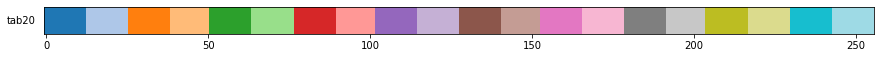

In [4]:
plot_color_gradients('tab20')

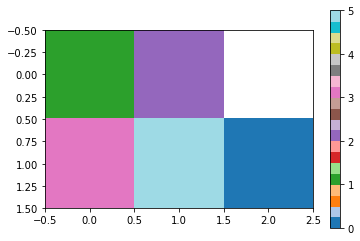

In [19]:
arr = np.array([[1., 2., np.nan], [3., 5., 0.]])
plt.imshow(arr, cmap='tab20')
plt.colorbar()

In [20]:
mini, maxi = np.min(arr), np.max(arr)
n_colors = int(maxi - mini + 1)
n_colors

ValueError: cannot convert float NaN to integer

In [15]:
colors = cm.get_cmap('viridis', n_colors)
colors.colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.229739, 0.322361, 0.545706, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.369214, 0.788888, 0.382914, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

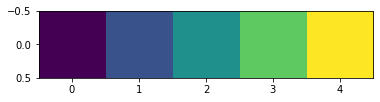

In [16]:
plt.imshow(colors.colors[np.newaxis, :])  # plot colors array (as RGBA values)

In [17]:
bounds = np.linspace(mini - 0.5, maxi + 0.5, n_colors + 1)
norm = BoundaryNorm(bounds, colors.N)

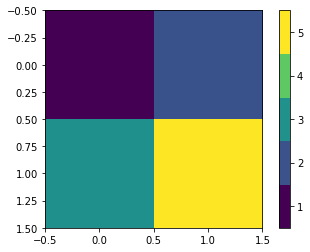

In [18]:
fig, ax = plt.subplots()

im = ax.imshow(arr, cmap=colors, norm=norm, interpolation=None)
fig.colorbar(im, ticks=bounds + 0.5)

In [11]:
bounds

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

In [12]:
norm

In [14]:
norm.vmin, norm.vmax

(0.5, 5.5)

In [14]:
def ppty_cbar(labelled_image, ppty):
    mini, maxi = min(ppty.values()), max(ppty.values())
